In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
from radar_chart import Radar

# FUNCTIONS

In [3]:
def converter(metric, *per90):
    "function that converts all string numbers to floats, and then standardises to per90 units if metric is not already in per90 terms"
    
    #get metric, convert to float
    float_metric = float(metric.values[0])

    if per90:
    #if per 90 value has been provided for conversion to per90 terms/units:
       
        #divide by no. of 90s, and return the standardised format
        metric_to_return = float_metric/per90[0]
        #per 90 is a tuple of indeterminate length, if per90 is not empty, 
        #then it will contain the value corresponding to the number of 90s, 
        #which will be first index
    
    else:
    #if no per 90 value has been provided, metric is already in per 90 terms, 
    #or in % terms or some other metric independent of playing time. In this 
    #case, just return the original metric in float form.
        metric_to_return = float_metric
    
    
    return [metric_to_return]

In [4]:
def merge_dfsv1(df1, df2):
    "function to merge/concatenate the individual player's dataframes into a single dataframe"

    # Concatenate along the rows axis (stack vertically)
    big_df = pd.concat([df1, df2], ignore_index=True)
    
    # add column to identify the player via their name
    name_column = ['Bellingham', 'Foden']
    
    # Adding the new column to the beginning of the DataFrame
    big_df.insert(0, 'Name', name_column)
    
    return big_df

In [5]:
def onedf_builder(b_df, f_df, metric = ''):
     
    
    "Function that streamlines the dataframe construction process. (1) Conditional on" 
    "the metric, it calls on the refined_*metric*_df function which constucts a dataframe"
    "for each player possessing the desired/relevant columns for the chosen metric. These refined
    "dataframe functions can be found in each dedicated metric section. (2) Then these"
    "individual player dataframes are passed to the merge_dfs function which concatenates" 
    "them into a single dataframe."
    
    
    if metric == "Standardised High-Level":
        df1 = standardised_refined_highlevel_df(b_df, i=4)
        df2 = standardised_refined_highlevel_df(f_df, i=7)
        
    elif metric == "Shooting":
        df1 = refined_shooting_df(b_df, i=4)
        df2 = refined_shooting_df(f_df, i=7)
        
    elif metric == "Passing":
        df1 = refined_passing_df(b_df, i=4)
        df2 = refined_passing_df(f_df, i=7)
        
    elif metric == "Dribbling":
        df1 = refined_dribbling_df(b_df, i=4)
        df2 = refined_dribbling_df(f_df, i=7)
        
    elif metric == "Defensive":
        df1 = refined_defending_df(b_df, i=4)
        df2 = refined_defending_df(f_df, i=7)
        
    else:
        df1 = refined_highlevel_df(b_df, i=4)
        df2 = refined_highlevel_df(f_df, i=7)
    
    merged_df = merge_dfsv1(df1, df2)

    return merged_df

In [6]:
def get_paramsv1(df, index):
    "function which returns the column names of a dataframe as a list. The index determines any columns to skip"
    "during the plotting process. For example, we added a name column above, but this won't be used for plotting." 
    "Hence, the first index will be skipped (during the function call)"
    
    params = list(df.columns)

    params = params[index:]
    
    return params

In [8]:
def range_calcv1(df, params):
    "calculates the ranges for the player radar. Given the merged dataframe," 
    "it goes through each variable/metric, finds the minimum and maximum values" 
    "and ensures the range extends beyond these values."

    ranges = []
    
    #go through each column/variable in the list provided during the function call
    for x in params:
    #for this particular metric/column    
        
        #find the minimum value
        a = min(df[x])
        #construct the lower bound of the range
        a = a - (a * 0.25)
        
        #find the maximum value
        b = max(df[x])
        #construct the upper bound of the range
        b = b + (b * 0.25)
        
        #add the lower and upper bound values for the specific column to the list 'ranges'
        ranges.append((a, b))
        
    return ranges

In [9]:
def values_calcv1(df, index):
    "calculates the actual values to plot on the player radar"

    bellingham_values = []
    foden_values = []
    
    player = df['Name']
    
    #calculate the number of player (names) provided
    for x in range(len(player)):
        

        if player[x] == 'Bellingham':
            bellingham_values = df.iloc[x].values.tolist()[index:]
            #identify Bellingham's row using .iloc and the index which identifies his row
            #Starting at the provided index, extract all values in this row, and return as a list 
            #index to skip out the name 
        
        
        if player[x] == 'Foden':
            foden_values = df.iloc[x].values.tolist()[index:]
            #identify Foden's row using .iloc and the index which identifies his row
            #Starting at the provided index, extract all values in this row, and return as a list
            #index to skip out the name
            
    values = [bellingham_values[0:], foden_values[0:]]
            
    return values

In [10]:
def radar_plotv1(ranges, params, values):
    "plots the radar!"

    title = dict(
        title_name='Jude Bellingham',
        title_color = 'black',
        subtitle_name = 'Real Madrid',
        subtitle_color = 'red',
        title_name_2='Phil Foden',
        title_color_2 = 'black',
        subtitle_name_2 = 'Manchester City',
        subtitle_color_2 = 'blue',
        title_fontsize = 18,
        subtitle_fontsize=15
    )
    
    radar = Radar()

    fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,
                         compare=True)
    
    return

In [11]:
def radar_pipeline(df, index = 1):
    "Function that  - Takes in a single (merged) dataframe containing" 
    "information for both players to plot. Then creates an automated" 
    "pipeline for plotting by calling on custom functions defined the" 
    "process of plotting the player radar."
    "(1) first calls on the function to construct the metrics/variables to plot,"
    "(2) then calculates the ranges for these metrics,"
    "(3) then calculates the actual values,""
    "(4) then plots. 
    
    df_params = get_paramsv1(df, index)
    df_ranges = range_calcv1(df, df_params) 
    df_values = values_calcv1(df, index)
    radar_plotv1(df_ranges, df_params, df_values)

# Scraping the Data


In [12]:
bellingham_url = 'https://fbref.com/en/players/57d88cf9/Jude-Bellingham'
bellingham_dfs = pd.read_html(bellingham_url)

foden_url = 'https://fbref.com/en/players/ed1e53f3/Phil-Foden'
foden_dfs = pd.read_html(foden_url)

# High-Level DataFrame

In [13]:
def refined_highlevel_df(df, i):
    "Function that constructs the high-level dataframe by extracting" 
    "the columns corresponding to the desired player metric"
    "from the main player dataframe (this is the input df)"
    
    "The metric values are not integers or floats but strings. So each" 
    "column/metric is then passed to a converter function to return the"
    "values as float"
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
       
    #add custom columns
    refined_df['Goals'] = converter(df[5][('Performance', 'Gls')][i:i+1])
    refined_df['Assists'] = converter(df[5][('Performance', 'Ast')][i:i+1])
    refined_df['Shot-creating Actions'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['Pass Completion (%)'] = converter(df[7][('Total', 'Cmp%')][i:i+1])
    refined_df['Dribbles'] = converter(df[11][('Carries', 'Carries')][i:i+1])
    refined_df['Tackles'] = converter(df[10][('Tackles', 'Tkl')][i:i+1])
    refined_df['Interceptions'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1])
    
    return refined_df

In [14]:
highlevel_df = onedf_builder(bellingham_dfs, foden_dfs)
highlevel_df

,Name,Goals,Assists,Shot-creating Actions,Pass Completion (%),Dribbles,Tackles,Interceptions
0,Bellingham,17.0,4.0,3.67,87.8,1080.0,37.0,21.0
1,Foden,16.0,7.0,4.47,85.6,1290.0,28.0,13.0


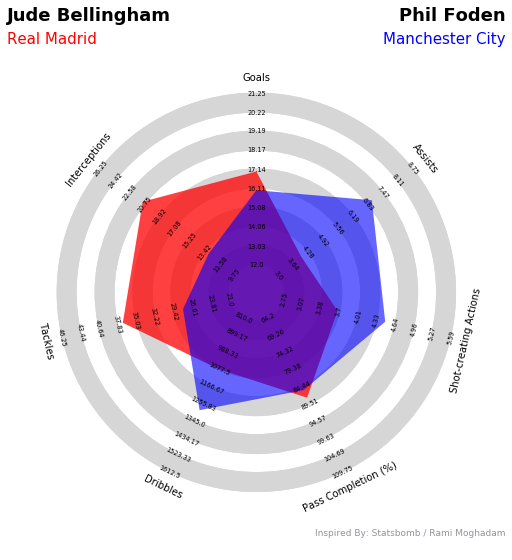

In [15]:
radar_pipeline(highlevel_df)

# Standardising

In [16]:
def standardised_refined_highlevel_df(df, i):
    "Function which does same as first refined-function but now with functionliaty to calculate"
    "standardised values (in per 90 minutes terms). This can be handled with the converter function"
    "as long as the number of 90 minutes is passed as an argument"
    
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Goals/90'] = converter(df[5][('Performance', 'Gls')][i:i+1], no_90s)
    refined_df['Assists/90'] = converter(df[5][('Performance', 'Ast')][i:i+1], no_90s)
    refined_df['Shot-creating Actions/90'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['Pass Completion (%)'] = converter(df[7][('Total', 'Cmp%')][i:i+1])
    refined_df['Dribbles/90'] = converter(df[11][('Carries', 'Carries')][i:i+1], no_90s)
    refined_df['Tackles/90'] = converter(df[10][('Tackles', 'Tkl')][i:i+1], no_90s)
    refined_df['Interceptions/90'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1], no_90s)
    
    return refined_df

In [17]:
standardised_highlevel_df = onedf_builder(bellingham_dfs, foden_dfs, "Standardised High-Level")
standardised_highlevel_df

,Name,Goals/90,Assists/90,Shot-creating Actions/90,Pass Completion (%),Dribbles/90,Tackles/90,Interceptions/90
0,Bellingham,0.726496,0.17094,3.67,87.8,46.153846,1.581197,0.897436
1,Foden,0.571429,0.25000,4.47,85.6,46.071429,1.000000,0.464286


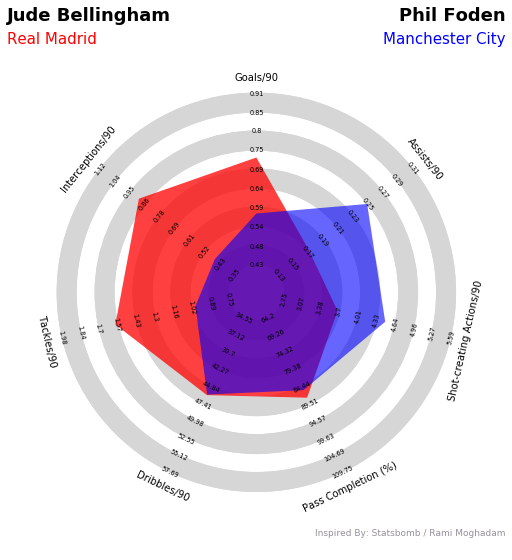

In [18]:
radar_pipeline(standardised_highlevel_df)

# Shooting Data Deepdive

In [19]:
def refined_shooting_df(df, i):
    "Same as before, but now for an in-depth shooting radar."
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['xG/90'] = converter(df[5][('Per 90 Minutes', 'xG')][i:i+1])
    refined_df['Non-Penalty xG/90'] = converter(df[5][('Per 90 Minutes', 'npxG')][i:i+1])
    refined_df['Goals per Shot'] = converter(df[6][('Standard', 'G/Sh')][i:i+1])
    refined_df['Avg. Shot Distance'] = converter(df[6][('Standard', 'Dist')][i:i+1])
    refined_df['Shots on Target/90'] = converter(df[6][('Standard', 'SoT/90')][i:i+1])
    refined_df['Shots on Target %'] = converter(df[6][('Standard', 'SoT%')][i:i+1])
    
    
    
    return refined_df

In [20]:
shooting_df = onedf_builder(bellingham_dfs, foden_dfs, "Shooting")
shooting_df

,Name,xG/90,Non-Penalty xG/90,Goals per Shot,Avg. Shot Distance,Shots on Target/90,Shots on Target %
0,Bellingham,0.45,0.42,0.29,14.6,1.28,53.6
1,Foden,0.33,0.33,0.17,18.4,1.43,43.0


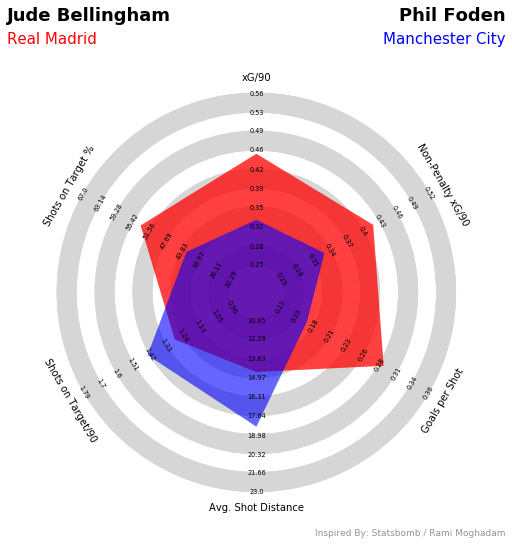

In [21]:
radar_pipeline(shooting_df)

# PASSING

In [22]:
def refined_passing_df(df, i):
    "Same as before, butnow for an in-depth passing radar."
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['xA/90'] = converter(df[7][('Expected', 'xA')][i:i+1])
    refined_df['Progressive Passes/90'] = converter(df[7][('Unnamed: 29_level_0', 'PrgP')][i:i+1], no_90s)
    refined_df['Passes into Final Third/90'] = converter(df[7][('Unnamed: 26_level_0', '1/3')][i:i+1], no_90s)
    refined_df['Through Balls/90'] = converter(df[8][('Pass Types', 'TB')][i:i+1], no_90s)
    refined_df['Shot-creating Actions/90'] = converter(df[9][('SCA', 'SCA90')][i:i+1])
    refined_df['SCA - In-play Actions/90'] = converter(df[9][('SCA Types', 'PassLive')][i:i+1], no_90s)
    
    return refined_df

In [23]:
passing_df = onedf_builder(bellingham_dfs, foden_dfs, "Passing")
passing_df

,Name,xA/90,Progressive Passes/90,Passes into Final Third/90,Through Balls/90,Shot-creating Actions/90,SCA - In-play Actions/90
0,Bellingham,3.2,7.264957,5.042735,0.683761,3.67,2.948718
1,Foden,6.4,5.392857,2.000000,0.464286,4.47,3.500000


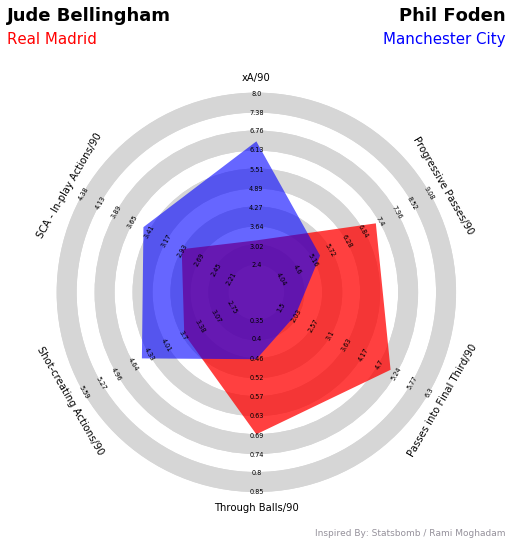

In [24]:
radar_pipeline(passing_df)

# DRIBBLING 

In [25]:
def refined_dribbling_df(df, i):
    "Same as before, butnow for an in-depth dribbling radar."
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Dribbles/90'] = converter(df[11][('Carries', 'Carries')][i:i+1], no_90s)
    refined_df['Successful Take-ons % /90'] = converter(df[11][('Take-Ons', 'Succ%')][i:i+1])
    refined_df['Progressive Dribbles/90'] = converter(df[11][('Carries', 'PrgC')][i:i+1], no_90s)
    refined_df['Dribbles into Att. Third/90'] = converter(df[11][('Carries', '1/3')][i:i+1], no_90s)
    refined_df['Touches/90'] = converter(df[11][('Touches', 'Touches')][i:i+1], no_90s)
    refined_df['Touches, Def. Third/90'] = converter(df[11][('Touches', 'Def 3rd')][i:i+1], no_90s)
    refined_df['Touches, Mid. Third/90'] = converter(df[11][('Touches', 'Mid 3rd')][i:i+1], no_90s)
    refined_df['Touches, Att. Third/90'] = converter(df[11][('Touches', 'Att 3rd')][i:i+1], no_90s)
    refined_df['Progressive Passes Received/90'] = converter(df[11][('Receiving', 'PrgR')][i:i+1], no_90s)
    
    return refined_df

In [26]:
dribbling_df = onedf_builder(bellingham_dfs, foden_dfs, "Dribbling")
dribbling_df

,Name,Dribbles/90,Successful Take-ons % /90,Progressive Dribbles/90,Dribbles into Att. Third/90,Touches/90,"Touches, Def. Third/90","Touches, Mid. Third/90","Touches, Att. Third/90",Progressive Passes Received/90
0,Bellingham,46.153846,50.0,3.290598,2.735043,70.854701,7.692308,36.324786,27.991453,6.623932
1,Foden,46.071429,44.7,3.178571,2.642857,67.392857,5.714286,23.964286,38.464286,8.785714


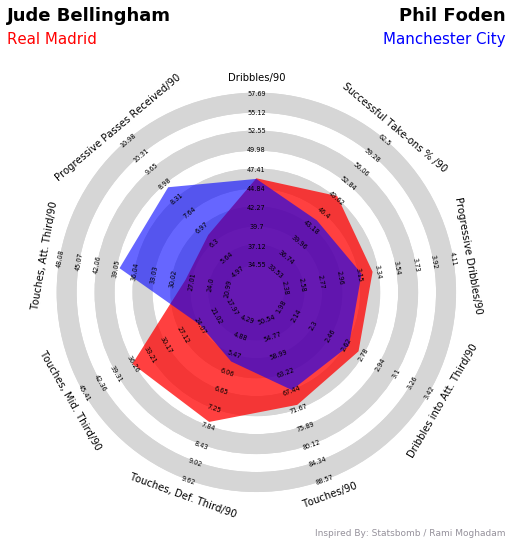

In [27]:
radar_pipeline(dribbling_df)

# DEFENDING

In [28]:
def refined_defending_df(df, i):
    "Same as before, butnow for an in-depth defensive attributes radar."
    
    #i is the index which identifies the 2023-24 season data for the player
    
    # Create an empty DataFrame
    refined_df = pd.DataFrame()
    
    #calculate standardiser
    no_90s = float(df[5][('Playing Time', '90s')][i:i+1].values[0])
    
    #add custom columns
    refined_df['Tackles Won/90'] = converter(df[10][('Tackles', 'TklW')][i:i+1], no_90s)
    refined_df['Tackles, Def. Third/90'] = converter(df[10][('Tackles', 'Def 3rd')][i:i+1], no_90s)
    refined_df['Tackles, Mid. Third/90'] = converter(df[10][('Tackles', 'Mid 3rd')][i:i+1], no_90s)
    refined_df['Tackles, Att. Third/90'] = converter(df[10][('Tackles', 'Att 3rd')][i:i+1], no_90s)
    refined_df['Interceptions/90'] = converter(df[10][('Unnamed: 19_level_0', 'Int')][i:i+1], no_90s)
    
    return refined_df

In [29]:
defending_df = onedf_builder(bellingham_dfs, foden_dfs, "Defensive")
defending_df

,Name,Tackles Won/90,"Tackles, Def. Third/90","Tackles, Mid. Third/90","Tackles, Att. Third/90",Interceptions/90
0,Bellingham,1.324786,0.470085,0.726496,0.384615,0.897436
1,Foden,0.642857,0.392857,0.321429,0.285714,0.464286


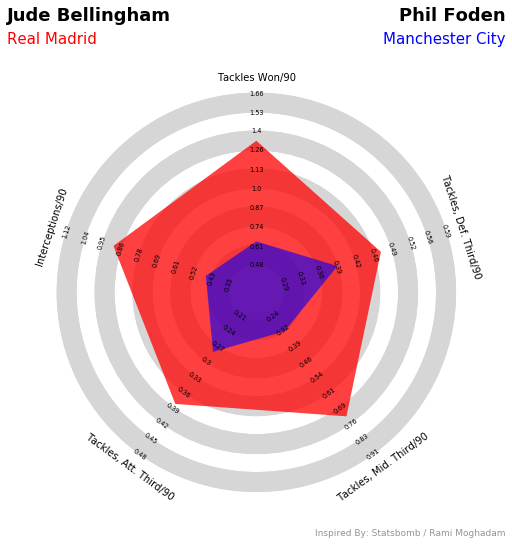

In [30]:
radar_pipeline(defending_df)